In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_theme(style="whitegrid")
plt.style.use('ggplot')

In [3]:
MODEL_DATA_PATH = "../data/output/phase2/model_data_test.csv"
AGENT_DATA_PATH = "../data/output/phase2/agent_data_test.csv"

In [4]:
try:
    model_df = pd.read_csv(MODEL_DATA_PATH)
    agent_df = pd.read_csv(AGENT_DATA_PATH, index_col=[0, 1])
    print(f"Successfully loaded Model Data (shape: {model_df.shape}) and Agent Data (shape: {agent_df.shape}).")
except FileNotFoundError:
    print(f"Error: Data files not found")

Successfully loaded Model Data (shape: (10, 4)) and Agent Data (shape: (150, 5)).


1. Model-Level Analysis: Food Pool and Population

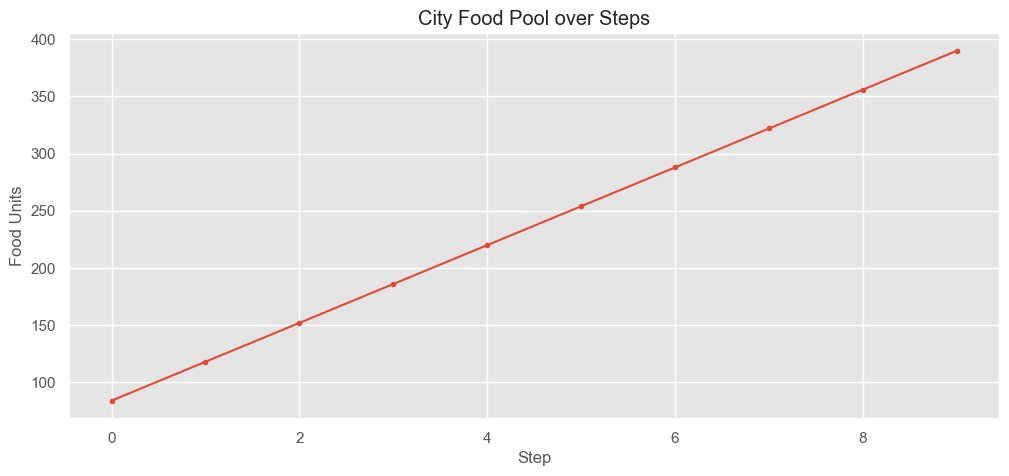

In [5]:
# 1.1 Food Pool over Time

plt.figure(figsize=(12,5))
plt.plot(model_df.index, model_df['FoodPool'], marker='.', linestyle='-')
plt.title('City Food Pool over Steps')
plt.xlabel('Step')
plt.ylabel('Food Units')
plt.grid(True)
plt.show()

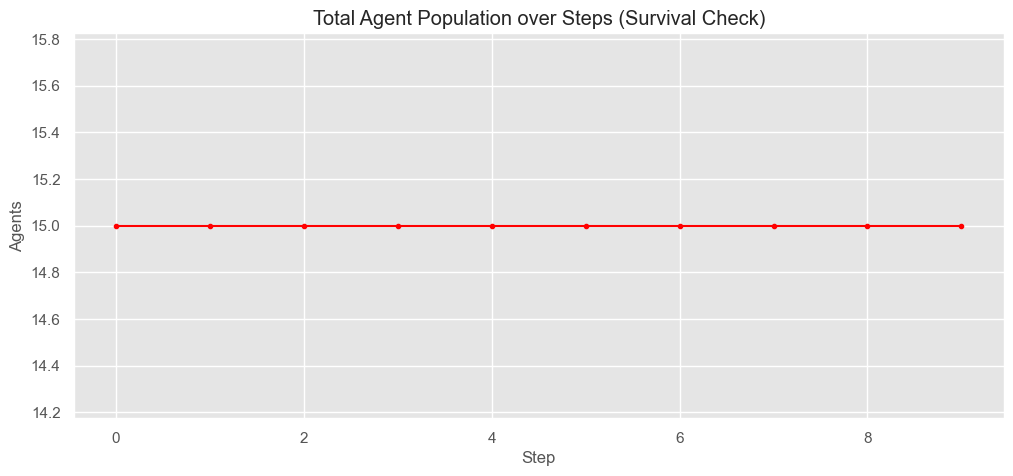

In [6]:
# 2.2 Total Agents (Population) over Time

plt.figure(figsize=(12, 5))
plt.plot(model_df.index, model_df['TotalAgents'], marker='.', linestyle='-', color='red')
plt.title('Total Agent Population over Steps (Survival Check)')
plt.xlabel('Step')
plt.ylabel('Agents')
plt.grid(True)
plt.show()

2. Agent-Level Analysis: Individual Wealth

<Figure size 1200x600 with 0 Axes>

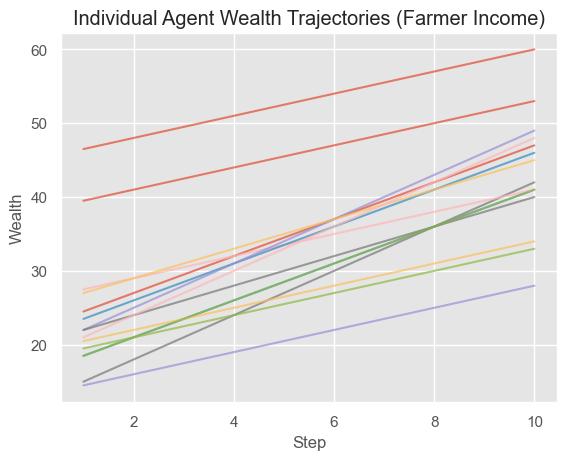

In [7]:
# 2.1 Agent-Wealth over Time

agent_df['Wealth'] = pd.to_numeric(agent_df['Wealth'], errors='coerce')
agent_df['Age'] = pd.to_numeric(agent_df['Age'], errors='coerce')

agent_df = agent_df.drop_duplicates(keep='last')

agent_df_reset = agent_df.reset_index()

agent_wealth = agent_df_reset.pivot(index='Step', columns='AgentID', values='Wealth')

plt.figure(figsize=(12, 6))
agent_wealth.plot(legend=False, alpha=0.7)
plt.title('Individual Agent Wealth Trajectories (Farmer Income)')
plt.xlabel('Step')
plt.ylabel('Wealth')
plt.show()